<a href="https://colab.research.google.com/github/amalsalilan/DataInsight_Sales_Data_Analysis_and_Visualization_Infosys_Internship_Dec2024/blob/K-Pavitra/Forecasting_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/Modelling dataset.csv') #reading the dataset
df

,OrderDate,Sales
0,01-01-2012,180.36
1,01-01-2012,872.48
2,02-01-2012,1239.06
3,02-01-2012,614.80
4,02-01-2012,4083.19
...,...,...
8394,30-12-2015,448.10
8395,30-12-2015,257.46
8396,30-12-2015,14.15
8397,30-12-2015,803.33


The dataset has 8399 rows and 2 columns

In [ ]:
df.info() #describes about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  8399 non-null   object 
 1   Sales      8399 non-null   float64
dtypes: float64(1), object(1)
memory usage: 131.4+ KB


In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d-%m-%Y') #converted the format of date from object to datetime
df['OrderDate']

,OrderDate
0,2012-01-01
1,2012-01-01
2,2012-01-02
3,2012-01-02
4,2012-01-02
...,...
8394,2015-12-30
8395,2015-12-30
8396,2015-12-30
8397,2015-12-30


In [ ]:
data=df[['OrderDate','Sales']]
data

,OrderDate,Sales
0,2012-01-01,180.36
1,2012-01-01,872.48
2,2012-01-02,1239.06
3,2012-01-02,614.80
4,2012-01-02,4083.19
...,...,...
8394,2015-12-30,448.10
8395,2015-12-30,257.46
8396,2015-12-30,14.15
8397,2015-12-30,803.33


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderDate  8399 non-null   datetime64[ns]
 1   Sales      8399 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 131.4 KB


In [ ]:
monthly_sales=data.set_index('OrderDate') #for time series make date as index always
monthly_sales

,Sales
OrderDate,
2012-01-01,180.36
2012-01-01,872.48
2012-01-02,1239.06
2012-01-02,614.80
2012-01-02,4083.19
...,...
2015-12-30,448.10
2015-12-30,257.46
2015-12-30,14.15


<ipython-input-10-a0c4e60abff1>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='OrderDate')['Sales'].sum()


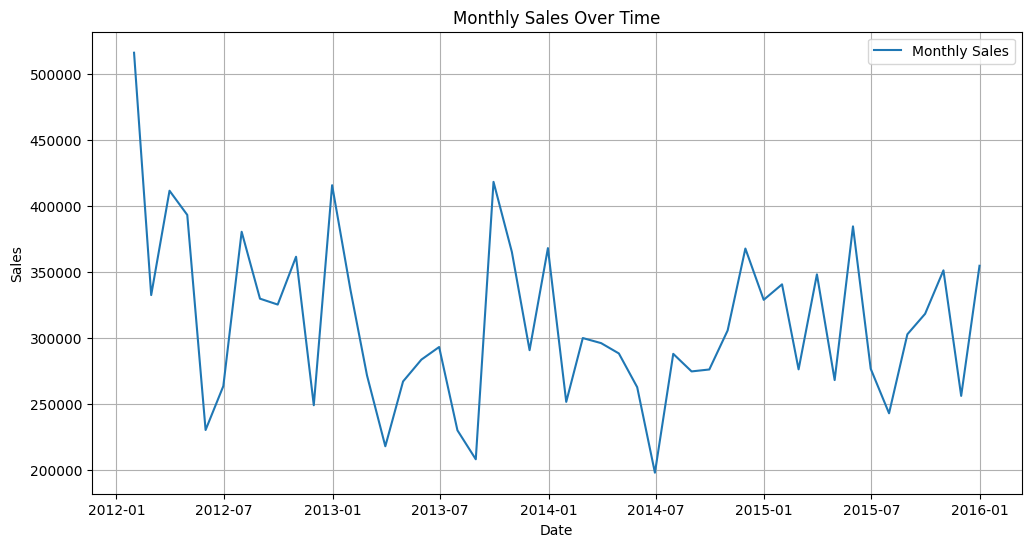

In [ ]:
monthly_sales = df.resample('M', on='OrderDate')['Sales'].sum()
 #resample() method to group  data by month ('M') based on sales
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
monthly_sales.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2012-01-31 to 2015-12-31
Freq: ME
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


To check the stationarity
1. ADF (if test statistics < criticalvalues) =>stationary
2.Rolling Statistics=>rolling mean,variance

Data stationary test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adTest=adfuller(monthly_sales.dropna(),autolag='AIC')
adTest

(-7.051210351232603,
 5.520440777337416e-10,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 914.5984138645377)

ADF statistic : -7.051210351232603
p value: 5.520440777337416e-10

In [ ]:
for key ,values in adTest[4].items():
  print('\n critical values for %s'%key,'is',values)


 critical values for 1% is -3.5778480370438146

 critical values for 5% is -2.925338105429433

 critical values for 10% is -2.6007735310095064


Observation:
If test statistics < :critical value => data is stationary
Therefore Data is stationary

ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

An ARIMA model has three component functions: AR (p), the number of lag observations or autoregressive terms in the model; I (d), the difference in the nonseasonal observations; and MA (q), the size of the moving average window.

p - Partial Autocorrelation Function (PACF)
d - Differencing
q - Autocorrelation Function (ACF)

Observations:
Test statistics<critical value    #stationary

In order to get the p,d,q values plotting pacf nd acf .

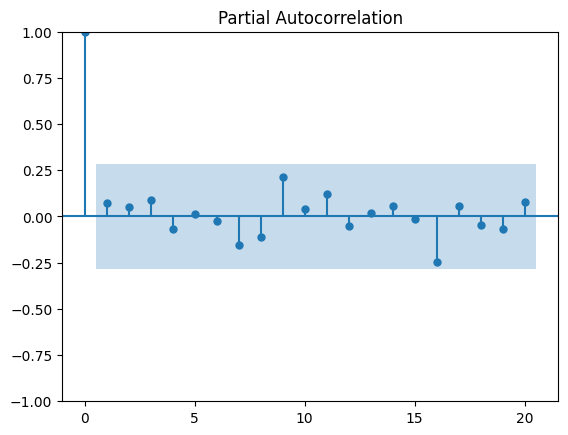

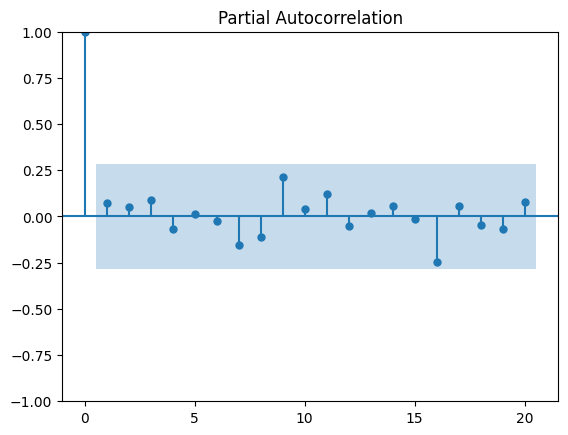

In [ ]:
plot_pacf(monthly_sales,lags=20)   #no spike is significantly statistically

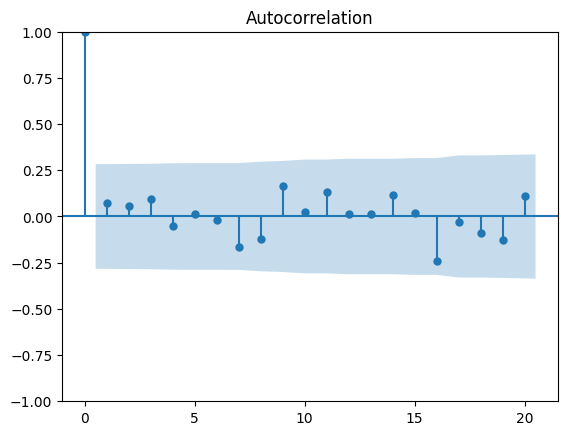

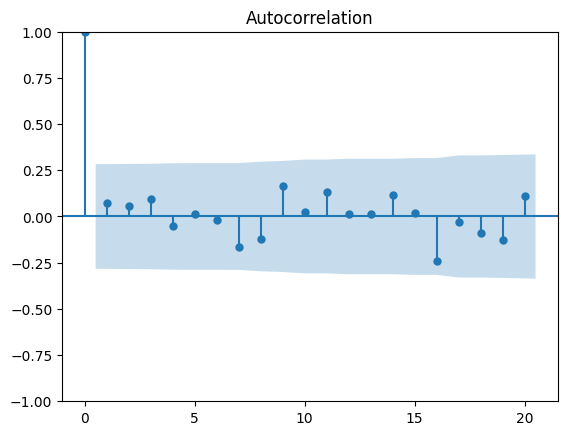

In [ ]:
plot_acf(monthly_sales,lags=20)

In [ ]:
#train and testing based on 12months
train=monthly_sales[:round(len(monthly_sales)*80/100)]   #preparing model for training and testing  where training is 80% nd 20% is testing
test=monthly_sales[round(len(monthly_sales)*80/100):]
train.head()


,Sales
OrderDate,
2012-01-31,516302.9595
2012-02-29,332480.6365
2012-03-31,411628.7290
2012-04-30,393276.4820
2012-05-31,230145.5380


In [ ]:
test.tail() #shows the testing values i.e the ending records

,Sales
OrderDate,
2015-08-31,302745.1235
2015-09-30,318271.5665
2015-10-31,351246.7325
2015-11-30,256020.1040
2015-12-31,354709.3380


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train,order=(1,1,1))
model_fit=model.fit()
train['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
train['predict']

,predicted_mean
2015-03-31,296623.556595
2015-04-30,300207.918901
2015-05-31,300834.907190
2015-06-30,300944.582017
2015-07-31,300963.766694
2015-08-31,300967.122540
2015-09-30,300967.709555
2015-10-31,300967.812238
2015-11-30,300967.830199
2015-12-31,300967.833341


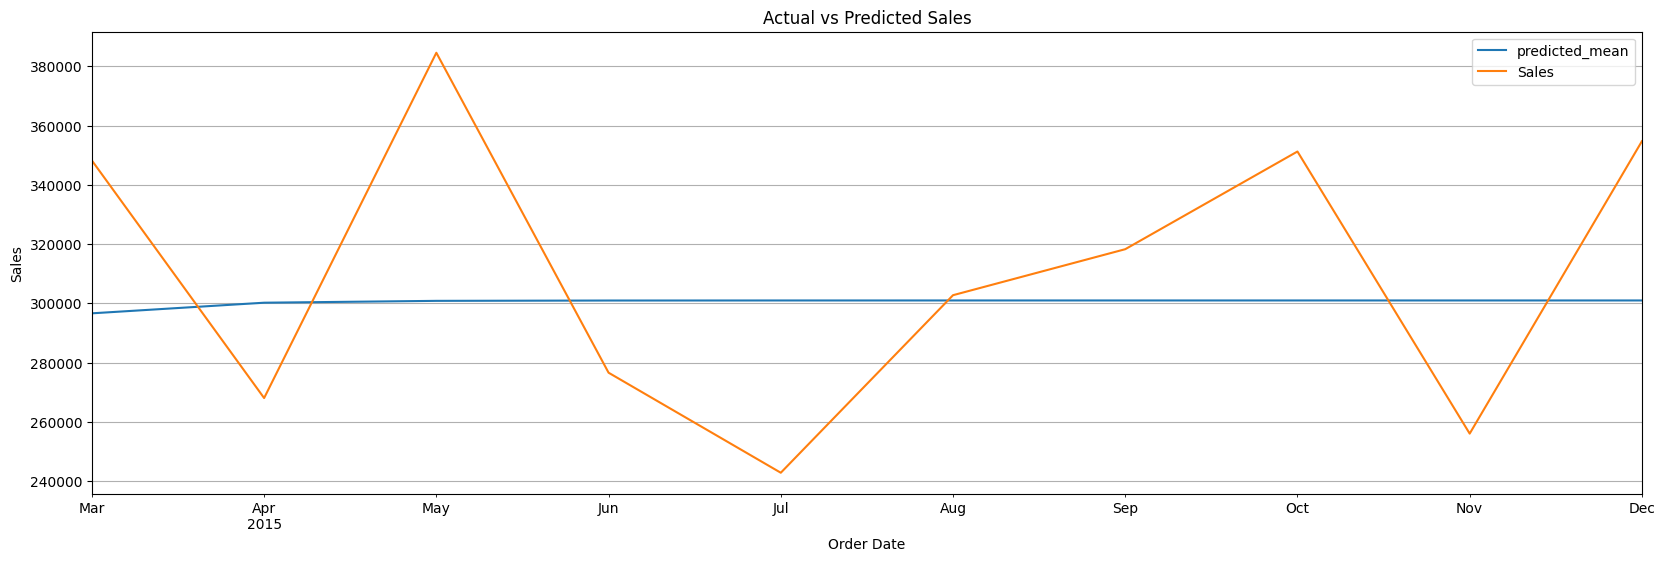

In [ ]:
plt.figure(figsize=(20, 6))
train['predict'].plot()
test.plot(label='Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

Observations:
We can observe that the prediction for the testing data results to be constant which is not correct.

In [ ]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(test,train['predict']))
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 47355.89317048223


SARIMA MODEL

Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models.

SARIMAX is used on data sets that have seasonal cycles. The difference between ARIMA and SARIMAX is the seasonality and exogenous factors (seasonality and regular ARIMA don't mix well).

Overall, ARIMA is a very decent type of models. However, the problem with this vanilla version is that it cannot handle seasonality — a big weakness. Comes SARIMA — the predecessor of SARIMAX.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
train=monthly_sales[:round(len(monthly_sales)*80/100)]
test=monthly_sales[round(len(monthly_sales)*80/100):]
train.head()

,Sales
OrderDate,
2012-01-31,516302.9595
2012-02-29,332480.6365
2012-03-31,411628.7290
2012-04-30,393276.4820
2012-05-31,230145.5380


In [ ]:
model = SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()
train['predict_sarimax']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
train['predict_sarimax']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


,predicted_mean
2015-03-31,295214.138748
2015-04-30,303860.017960
2015-05-31,273075.689199
2015-06-30,247331.634373
2015-07-31,301341.928009
2015-08-31,284203.174464
2015-09-30,317757.932111
2015-10-31,331078.169409
2015-11-30,337905.966785
2015-12-31,360255.392289


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test,train['predict_sarimax']))
print(f"Mean Squared Error (MSE): {rmse}")


Mean Squared Error (MSE): 53193.964769803


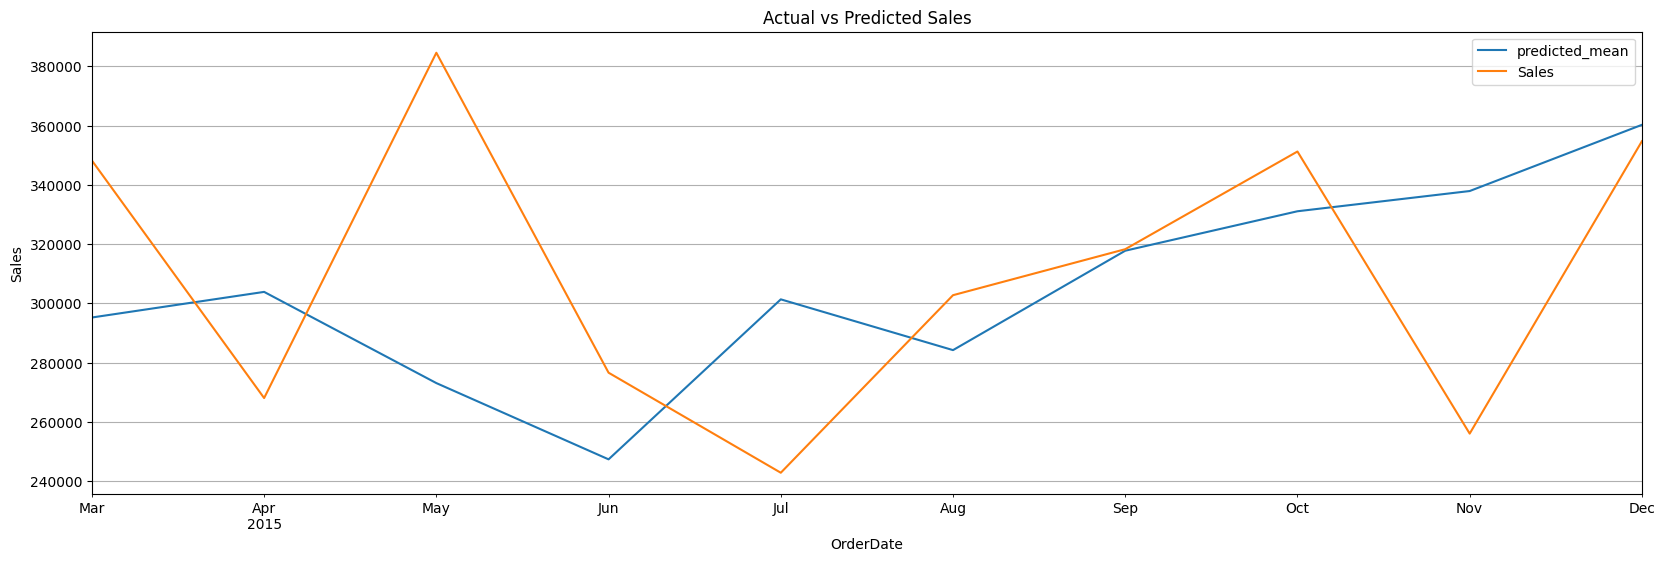

In [ ]:
plt.figure(figsize=(20, 6))
train['predict_sarimax'].plot()
test.plot(label='Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('OrderDate')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

Observations
We can observe that the predictions of test data are close to the training one as we can see similar seasonality.

In [ ]:
#for future prediction (12 months)
future_horizon = 12
forecast_df = model_fit.predict(start=len(monthly_sales),
                                 end=len(monthly_sales) + future_horizon - 1)

In [ ]:
final_prediction = pd.concat([train['predict_sarimax'], forecast_df])


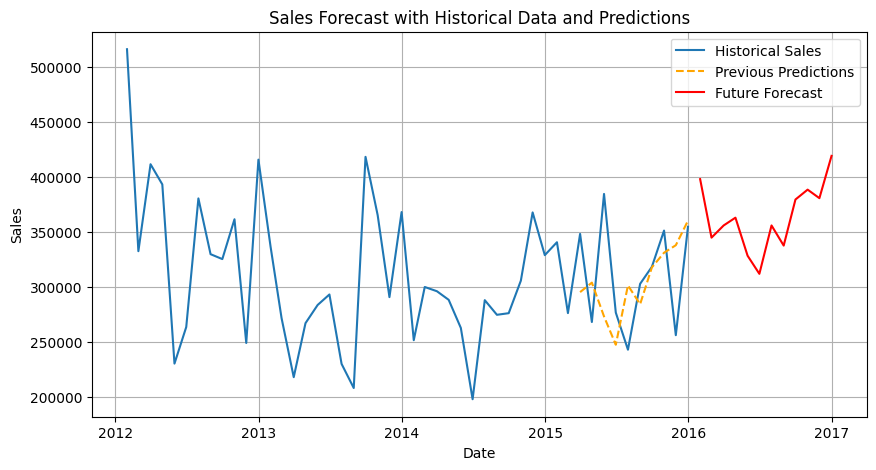

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label='Historical Sales') #plot historic sales

plt.plot(train['predict_sarimax'].index, train['predict_sarimax'].values,  #plot of previous predictions
label='Previous Predictions', color='orange', linestyle='--')

plt.plot(forecast_df.index, forecast_df.values, label='Future Forecast', color='red')#plot for future

plt.title('Sales Forecast with Historical Data and Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

Observations:
We can observe that the SARIMA model is giving better forecasting for the future as well.The forecasted result is closer to that of the training and testing one .